In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
print('Libraries imported.')

Libraries imported.


In [4]:
url = ('/content/archive (2).zip')
columns = ['category_length','price_width','rating_length','stock_width','class']
df = pd.read_csv(url, names=columns)
df.head()

,category_length,price_width,rating_length,stock_width,class
0,Category,Price,Rating,Stock,Discount
1,NaN,5548.0,1.8703220155006277,NaN,0.0
2,NaN,3045.0,4.757798057831803,NaN,38.0
3,NaN,4004.0,NaN,In Stock,0.0
4,NaN,4808.0,1.492084885301209,NaN,33.0


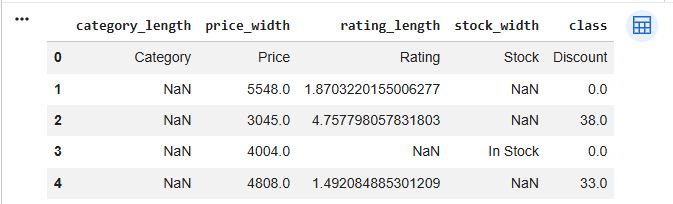

In [5]:
print('Shape:', df.shape)
print('\nColumn Names:', df.columns.tolist())
df.head()


Shape: (4363, 5)

Column Names: ['category_length', 'price_width', 'rating_length', 'stock_width', 'class']


,category_length,price_width,rating_length,stock_width,class
0,Category,Price,Rating,Stock,Discount
1,NaN,5548.0,1.8703220155006277,NaN,0.0
2,NaN,3045.0,4.757798057831803,NaN,38.0
3,NaN,4004.0,NaN,In Stock,0.0
4,NaN,4808.0,1.492084885301209,NaN,33.0


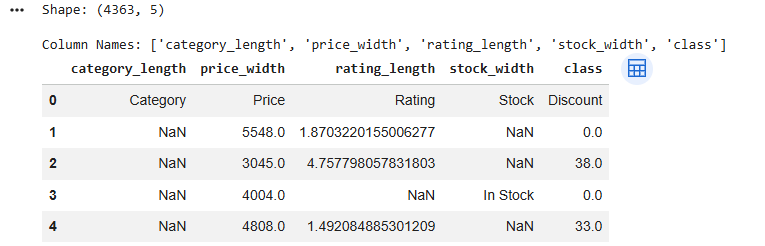

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category_length  1615 non-null   object
 1   price_width      4189 non-null   object
 2   rating_length    2313 non-null   object
 3   stock_width      3011 non-null   object
 4   class            3971 non-null   object
dtypes: object(5)
memory usage: 170.6+ KB


In [7]:
df.describe()


,category_length,price_width,rating_length,stock_width,class
count,1615,4189,2313,3011,3971
unique,5,3423,2313,3,51
top,C,8483.0,2.1844713146352674,In Stock,15.0
freq,425,4,1,1513,104


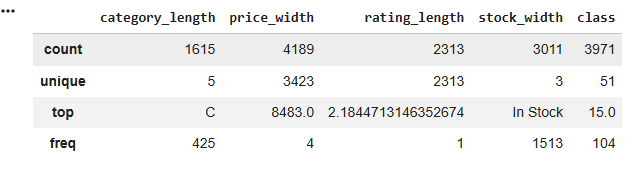

In [8]:
df.isnull().sum()


,0
category_length,2748
price_width,174
rating_length,2050
stock_width,1352
class,392


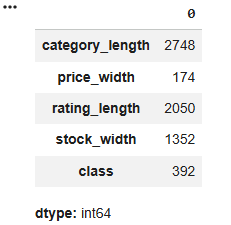

In [9]:
# Example strategy: fill numeric columns with mean
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-1648347935.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
category_length,0
price_width,0
rating_length,0
stock_width,0
class,0


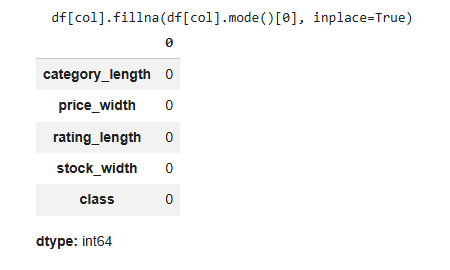

In [10]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print('Duplicates removed:', before - after)


Duplicates removed: 27


In [11]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head()

,category_length,price_width,rating_length,stock_width,class
0,Category,Price,Rating,Stock,50
1,C,5548.0,1.8703220155006277,In Stock,0
2,C,3045.0,4.757798057831803,In Stock,32
3,C,4004.0,1.0003662024741131,In Stock,0
4,C,4808.0,1.492084885301209,In Stock,27


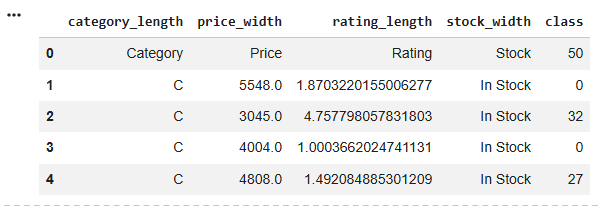

In [15]:
scaler = StandardScaler()
cols = ['category_length','price_width','rating_length','stock_width']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,category_length,price_width,rating_length,stock_width,class
1,0.247971,0.230107,-0.164924,-0.722209,-1.575525
2,0.247971,-0.639757,2.030235,-0.722209,0.621821
3,0.247971,-0.306477,-0.826294,-0.722209,-1.575525
4,0.247971,-0.027064,-0.452473,-0.722209,0.278486
5,0.247971,-1.066522,-0.826294,1.384640,-0.476852


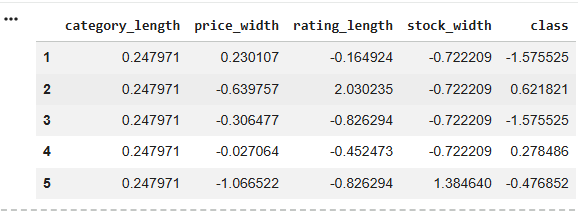

In [16]:
df.to_csv('assignment2_cleaned_archive2.csv', index=False)
print('Saved: assignment2_cleaned_archive2.csv')


Saved: assignment2_cleaned_archive2.csv


## Conclusion: Data Preprocessing Summary

The analysis successfully transformed a raw dataset of 4,363 entries into a model-ready format. Key achievements include:


**Data Cleaning**: Addressed significant missing values across all columns by imputing the **mode** for categorical data and the **mean** for numeric data .



**Integrity Checks**: Improved data quality by identifying and removing **27 duplicate records** .



**Normalization**: Standardized the feature set using `StandardScaler` to ensure uniform scale across variables like price and rating.



**Encoding**: Converted the `class` target variable into numerical values using `LabelEncoder` for compatibility with machine learning algorithms.



The finalized dataset was exported as `assignment2_cleaned_archive2.csv`, providing a clean, scaled, and fully numerical foundation for predictive modeling .
